In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.2.0-rc2
Hub version: 0.8.0
GPU available (YESS!!!!)


In [3]:
import tensorflow.keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [4]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

**# Visualizing the data**

In [7]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()
x_training = len(X_train)

for i in np.arange(0,L_grid*W_grid):
    index = np.random.randint(0, x_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

Output hidden; open in https://colab.research.google.com to view.

# Data preparation


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
number_cat = 10

In [0]:
# Making y_train and y_test binary

import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [11]:
y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]], dtype=float32))

In [0]:
# Normalizing X_train and X_test

X_train = X_train/255
X_test = X_test/255

In [13]:
X_train, X_test

(array([[[[0.23137255, 0.24313726, 0.24705882],
          [0.16862746, 0.18039216, 0.1764706 ],
          [0.19607843, 0.1882353 , 0.16862746],
          ...,
          [0.61960787, 0.5176471 , 0.42352942],
          [0.59607846, 0.49019608, 0.4       ],
          [0.5803922 , 0.4862745 , 0.40392157]],
 
         [[0.0627451 , 0.07843138, 0.07843138],
          [0.        , 0.        , 0.        ],
          [0.07058824, 0.03137255, 0.        ],
          ...,
          [0.48235294, 0.34509805, 0.21568628],
          [0.46666667, 0.3254902 , 0.19607843],
          [0.47843137, 0.34117648, 0.22352941]],
 
         [[0.09803922, 0.09411765, 0.08235294],
          [0.0627451 , 0.02745098, 0.        ],
          [0.19215687, 0.10588235, 0.03137255],
          ...,
          [0.4627451 , 0.32941177, 0.19607843],
          [0.47058824, 0.32941177, 0.19607843],
          [0.42745098, 0.28627452, 0.16470589]],
 
         ...,
 
         [[0.8156863 , 0.6666667 , 0.3764706 ],
          [0.78823

 # Building AI

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
cnn_model = Sequential()

# Adding first layer of convolutional network
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

# Adding second layer of convolutional network
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

# Adding flattening layer
cnn_model.add(Flatten())

# Adding hidden layer
cnn_model.add(Dense(units=512, activation = 'relu'))
cnn_model.add(Dense(units=512, activation = 'relu'))

# Adding output layer
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [0]:
# Compiling the model

cnn_model.compile(optimizer = keras.optimizers.rmsprop(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
# Fitting the model to data

history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 50, shuffle = True)

Epoch 1/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.5504 - accuracy: 0.4426
Epoch 2/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.1220 - accuracy: 0.6116
Epoch 3/50
50000/50000 [==============================] - 11s 217us/step - loss: 0.9995 - accuracy: 0.6581
Epoch 4/50
50000/50000 [==============================] - 11s 215us/step - loss: 0.9561 - accuracy: 0.6768
Epoch 5/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.9307 - accuracy: 0.6886
Epoch 6/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.9116 - accuracy: 0.6940
Epoch 7/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.8928 - accuracy: 0.7047
Epoch 8/50
50000/50000 [==============================] - 11s 219us/step - loss: 0.8932 - accuracy: 0.7018
Epoch 9/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.8872 - accuracy: 0.7036
Epoch 10/50
50000/50000 [============

# Evaluating the model

In [18]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 108us/step
Test accuracy: 0.6805999875068665


In [19]:
# Making prediction
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 0, 7])

In [0]:
y_test = y_test.argmax(1)

In [21]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

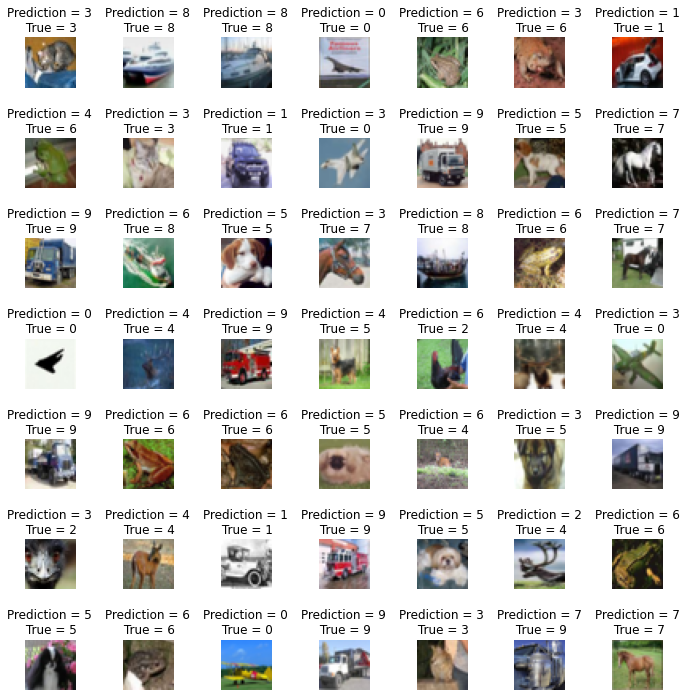

In [22]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 1)

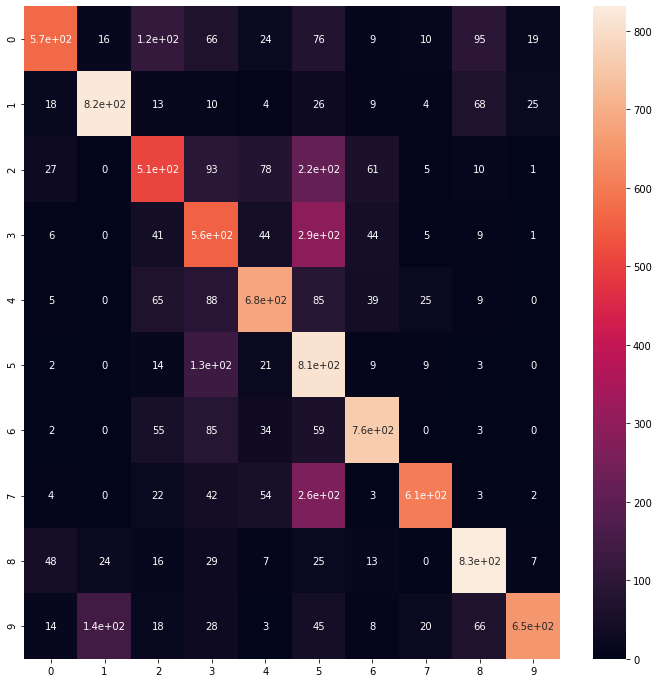

In [23]:
 # Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (12,12))
sns.heatmap(cm, annot=True);

# Saving the model

In [0]:
import os
directory = os.path.join(os.getcwd(), 'Saved_Models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'cifar10_trained_model.h5')
cnn_model.save(model_path)